# Modsim Project 2 - Insulator
By Corinne wilklow and Dieter Brehm

## Let's try Processing the OWall Data

In [55]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [56]:
m = UNITS.meter
K = UNITS.kelvin
W = UNITS.watt
J = UNITS.joule
degC = UNITS.celsius

<Unit('degC')>

Q_in and Q_out are Avgs in W/m^2, T_int and T_ext are Avgs in Deg C

In [57]:
data = pd.read_csv('DataOWall.csv', parse_dates=[0], index_col=0, header=0, skiprows=[1,2])
data.head()

,Q_in,Q_out,T_int,T_ext
2014-10-05 16:30:00,10.994,6.840,16.92,14.68
2014-10-05 16:35:00,10.952,6.012,16.92,14.69
2014-10-05 16:40:00,10.882,7.040,16.93,14.66
2014-10-05 16:45:00,10.798,8.880,16.93,14.59
2014-10-05 16:50:00,10.756,10.491,16.94,14.50


Convert Index entries to seconds, noticing the spacing between recordings

In [58]:
timestamp_0 = get_first_label(data)
time_deltas = data.index - timestamp_0;

In [59]:
data.index = time_deltas.days * 86400 + time_deltas.seconds
data.head()

,Q_in,Q_out,T_int,T_ext
0,10.994,6.840,16.92,14.68
300,10.952,6.012,16.92,14.69
600,10.882,7.040,16.93,14.66
900,10.798,8.880,16.93,14.59
1200,10.756,10.491,16.94,14.50


Add units to each dataframe (Q_in, Q_out, T_int, T_ext)

In [62]:
data.Q_in.units = W / m**2
data.Q_out.units = W / m**2
data.T_int.units = degC
data.T_ext.units = degC;

Plot the data over time

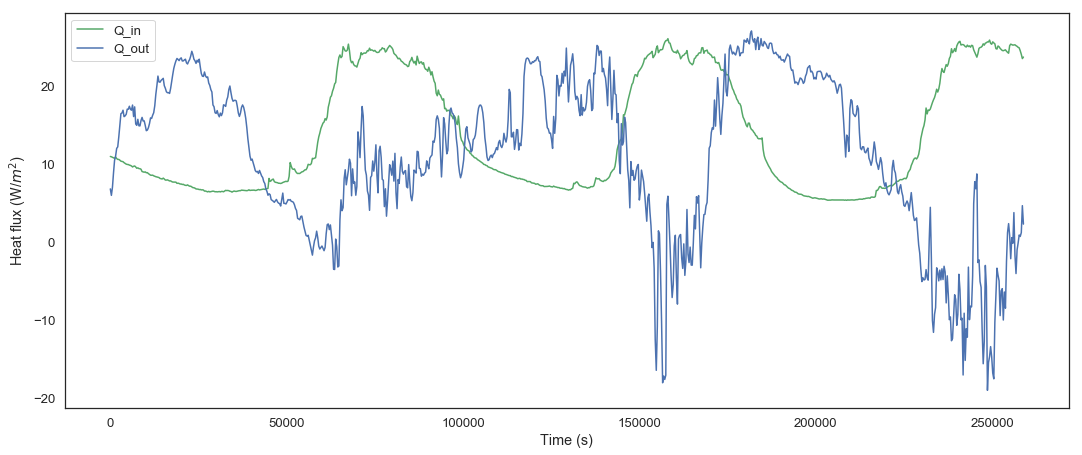

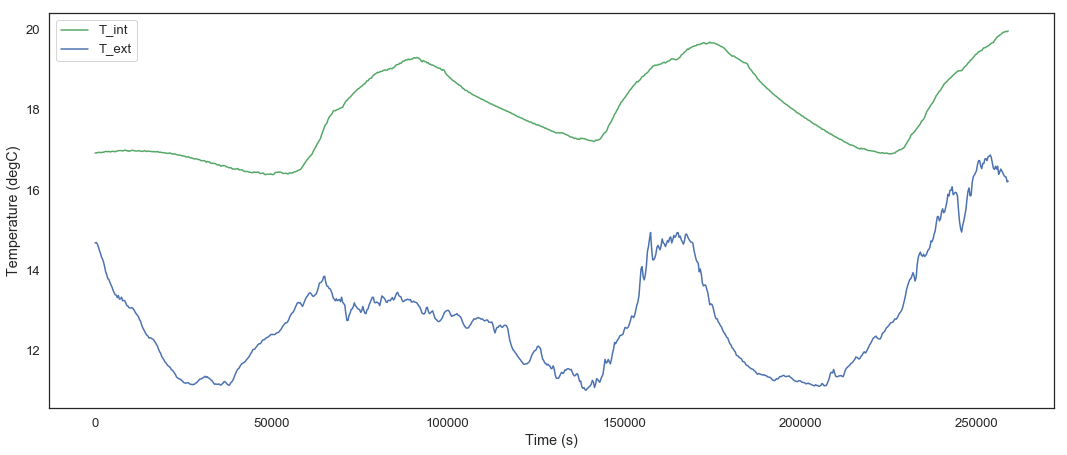

In [63]:
data_plot = plt.figure(figsize=(18, 16))
ax1 = data_plot.add_subplot(211)
ax1.plot(data.Q_in, color='C2', label='Q_in')
ax1.plot(data.Q_out, color='C0', label='Q_out')
legend()
ax1.set_ylabel('Heat flux (W/$m^2$)')
ax1.set_xlabel('Time (s)')

data_plot2 = plt.figure(figsize=(18, 16))
ax1 = data_plot2.add_subplot(212)
ax1.plot(data.T_int, color='C2', label='T_int')
ax1.plot(data.T_ext, color='C0', label='T_ext')
ax1.set_ylabel('Temperature (degC)')
ax1.set_xlabel('Time (s)')
legend();